In [99]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text

#Preprocessing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split


In [100]:
#Create Database Connection
engine = create_engine("sqlite:///Resources/spotify_2023.sqlite", echo=False)

In [101]:
%ls

Leo_Spotify1.ipynb     Resources/             your_database.db
Noah_Spotify.ipynb     spotify_cleaned.ipynb


In [102]:
#Refelect Database into ORM Classes
Base = automap_base()
Base.prepare(autoload_with=engine, reflect=True)
MyTable = Base.classes.keys()

session = Session(engine)

/var/folders/sp/wj92j4n17n5267jmds8xttfc0000gn/T/ipykernel_15016/3111436728.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(autoload_with=engine, reflect=True)


In [103]:
#get a list of column names and types
inspector = inspect(engine)
columns = inspector.get_columns('cleaned_spotify_2023')

for col in columns:
    print(col['name'], col['type'])


ID INTEGER
track_name TEXT
artist(s)_name TEXT
contributing_artist_count INTEGER
released_year INTEGER
released_month INTEGER
in_spotify_playlists INTEGER
spotify_chart_rank INTEGER
streams INTEGER
in_apple_playlists INTEGER
apple_chart_rank INTEGER
in_deezer_playlists INTEGER
deezer_chart_rank INTEGER
shazam_chart_rank INTEGER
bpm INTEGER
key TEXT
mode TEXT
danceability_% INTEGER
valence_% INTEGER
energy_% INTEGER
acousticness_% INTEGER
instrumentalness_% INTEGER
liveness_% INTEGER
speechiness_% INTEGER


In [104]:

# Assuming df is your DataFrame after loading the data from the SQLAlchemy engine
clean_spotify_df = pd.read_sql_table('cleaned_spotify_2023', engine)

col_list = []
for col in clean_spotify_df.columns:
    col_list.append(str(col))
clean_spotify_df.columns=col_list

# Rename 'artist(s)_name' to 'artists_name'
cleaned_spotify_df = clean_spotify_df.rename(columns={'artist(s)_name': 'artists_name',
                        'danceability_%': 'danceability',
                        'valence_%': 'valence',
                        'energy_%': 'energy', 
                        'acousticness_%': 'acousticness', 
                        'instrumentalness_%': 'instrumentalness',  
                        'liveness_%': 'liveness',
                        'speechiness_%': 'speechiness'
                        })

# Verify the change
print(cleaned_spotify_df.columns)

Index(['ID', 'track_name', 'artists_name', 'contributing_artist_count',
       'released_year', 'released_month', 'in_spotify_playlists',
       'spotify_chart_rank', 'streams', 'in_apple_playlists',
       'apple_chart_rank', 'in_deezer_playlists', 'deezer_chart_rank',
       'shazam_chart_rank', 'bpm', 'key', 'mode', 'danceability', 'valence',
       'energy', 'acousticness', 'instrumentalness', 'liveness',
       'speechiness'],
      dtype='object')


In [105]:
cleaned_spotify_df.head()

,ID,track_name,artists_name,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,1,seven feat latto explicit ver,latto jung kook,2,2023,7,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,2,lala,myke towers,1,2023,3,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,3,vampire,olivia rodrigo,1,2023,6,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,4,cruel summer,taylor swift,1,2019,8,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,5,where she goes,bad bunny,1,2023,5,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [106]:
# #Dropping Column 'ID', 'track_name', 'artists_name' 
new_df = cleaned_spotify_df.drop(columns=['ID', 'track_name', 'artists_name', 'key', 'mode'])
new_df.head()

,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,in_deezer_playlists,deezer_chart_rank,shazam_chart_rank,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,2,2023,7,553,147,141381703,43,263,45,10,826,125,80,89,83,31,0,8,4
1,1,2023,3,1474,48,133716286,48,126,58,14,382,92,71,61,74,7,0,10,4
2,1,2023,6,1397,113,140003974,94,207,91,14,949,138,51,32,53,17,0,31,6
3,1,2019,8,7858,100,800840817,116,207,125,12,548,170,55,58,72,11,0,11,15
4,1,2023,5,3133,50,303236322,84,133,87,15,425,144,65,23,80,14,63,11,6


In [107]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   contributing_artist_count  817 non-null    int64
 1   released_year              817 non-null    int64
 2   released_month             817 non-null    int64
 3   in_spotify_playlists       817 non-null    int64
 4   spotify_chart_rank         817 non-null    int64
 5   streams                    817 non-null    int64
 6   in_apple_playlists         817 non-null    int64
 7   apple_chart_rank           817 non-null    int64
 8   in_deezer_playlists        817 non-null    int64
 9   deezer_chart_rank          817 non-null    int64
 10  shazam_chart_rank          817 non-null    int64
 11  bpm                        817 non-null    int64
 12  danceability               817 non-null    int64
 13  valence                    817 non-null    int64
 14  energy                    

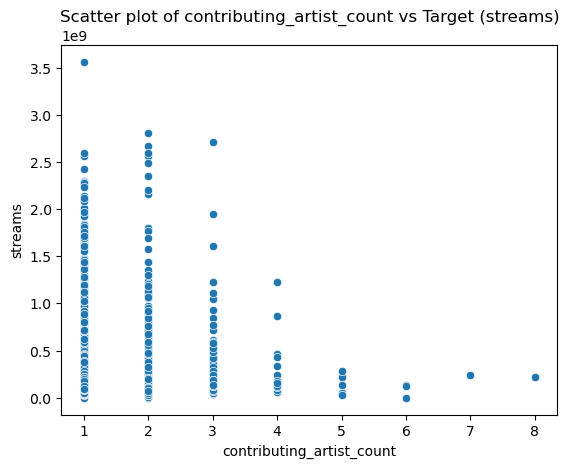

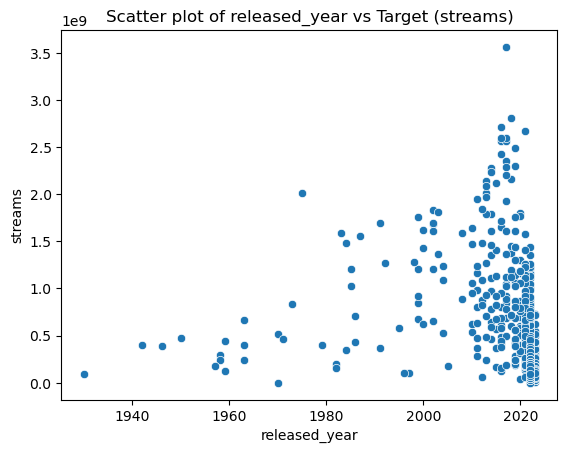

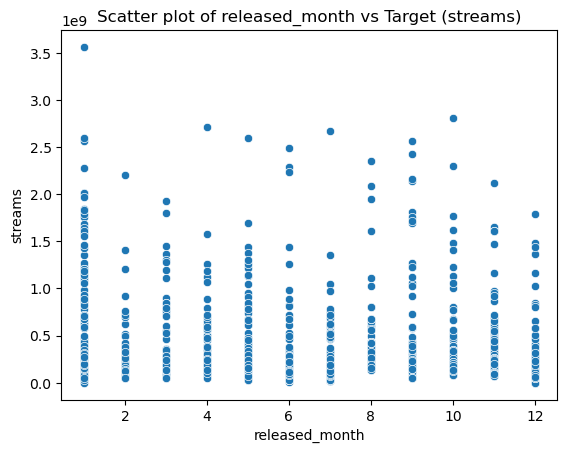

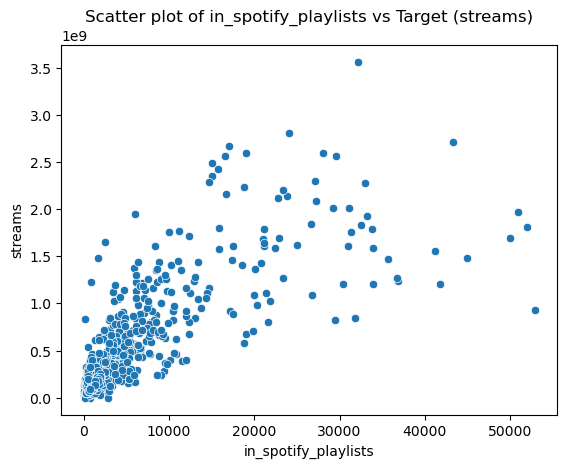

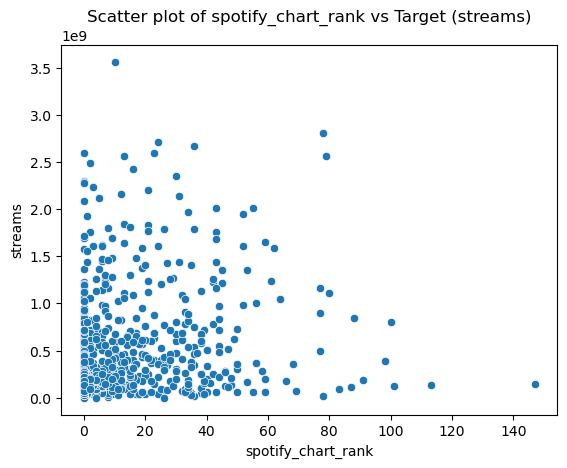

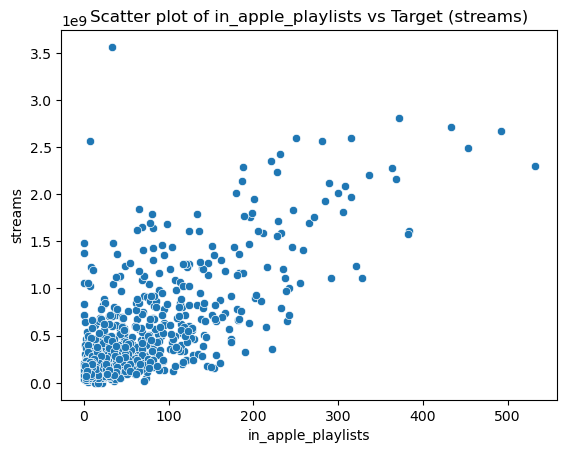

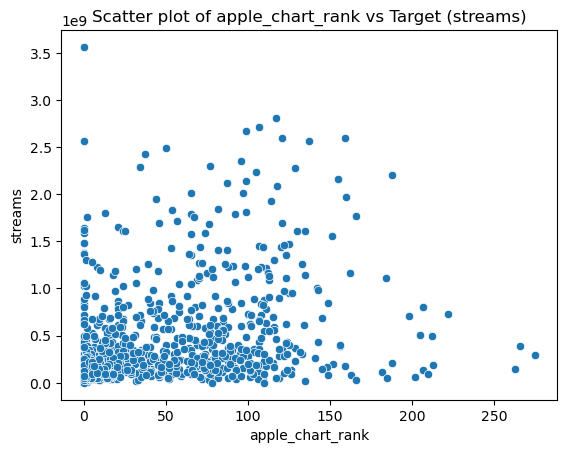

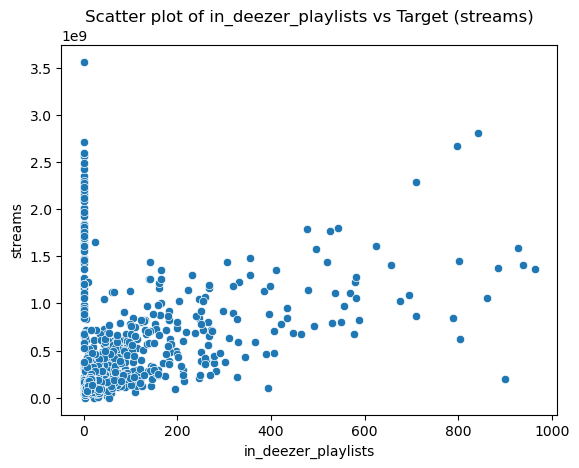

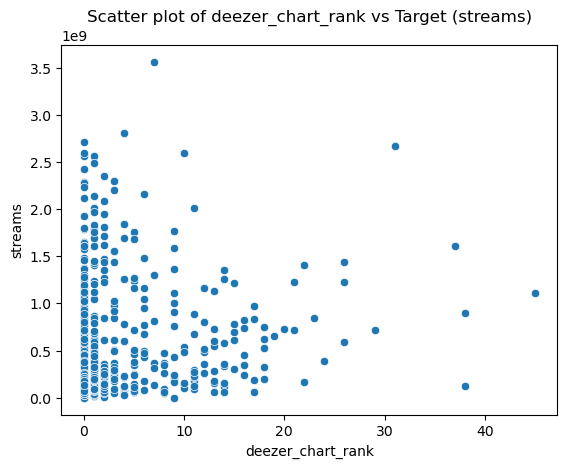

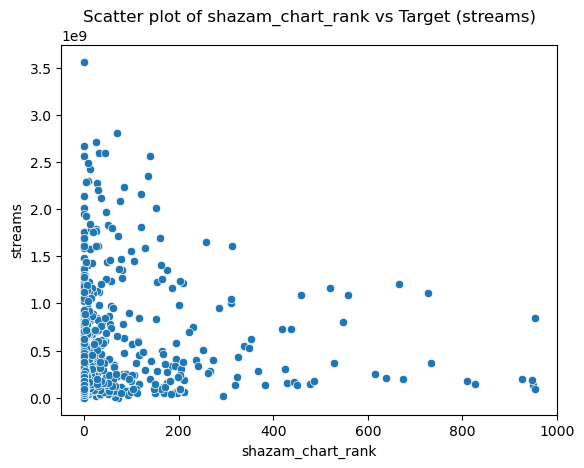

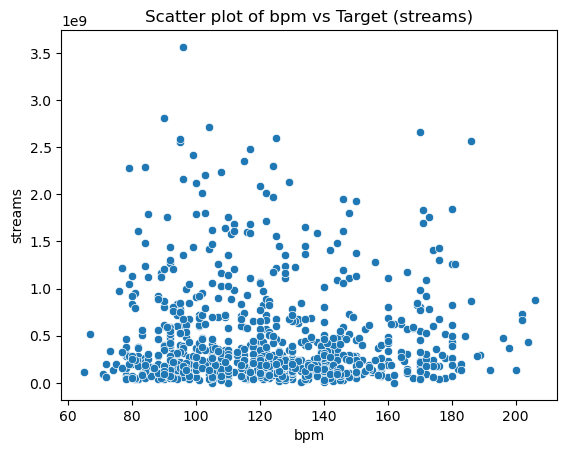

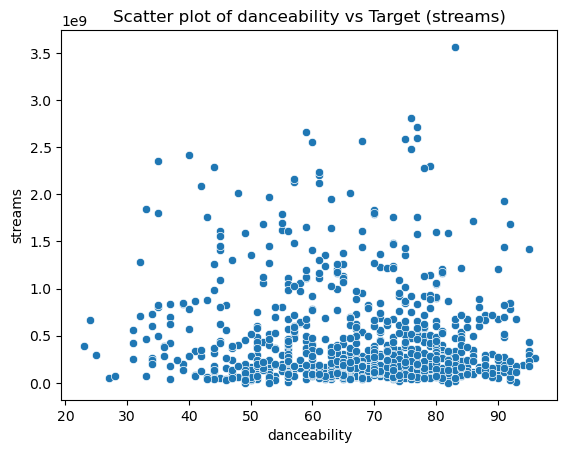

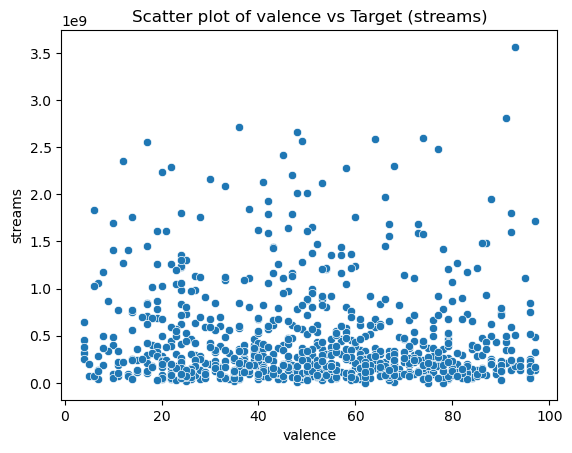

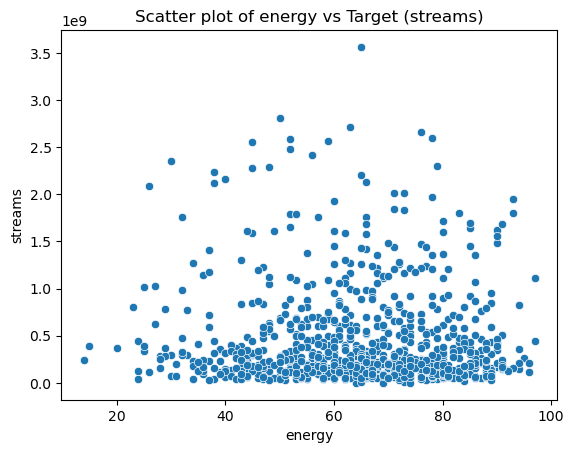

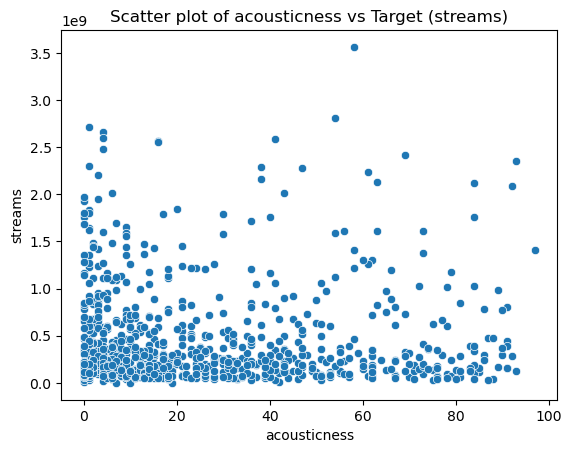

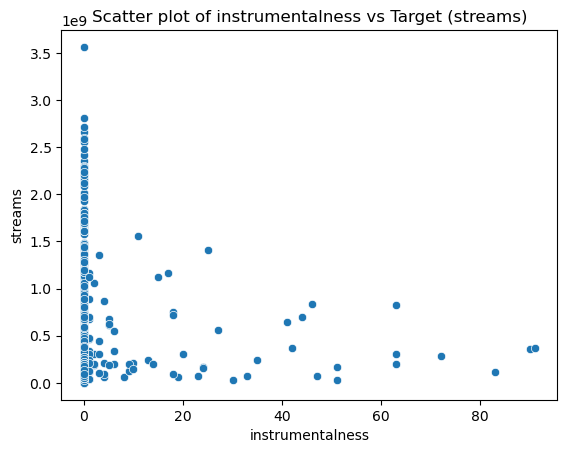

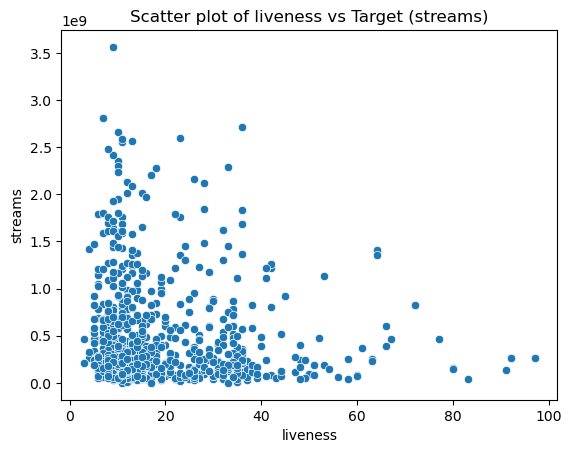

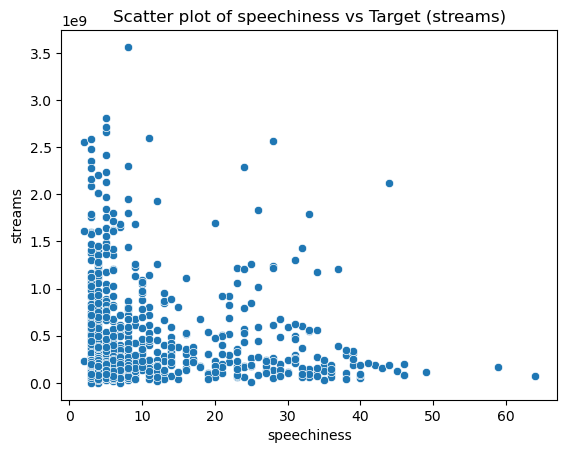

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


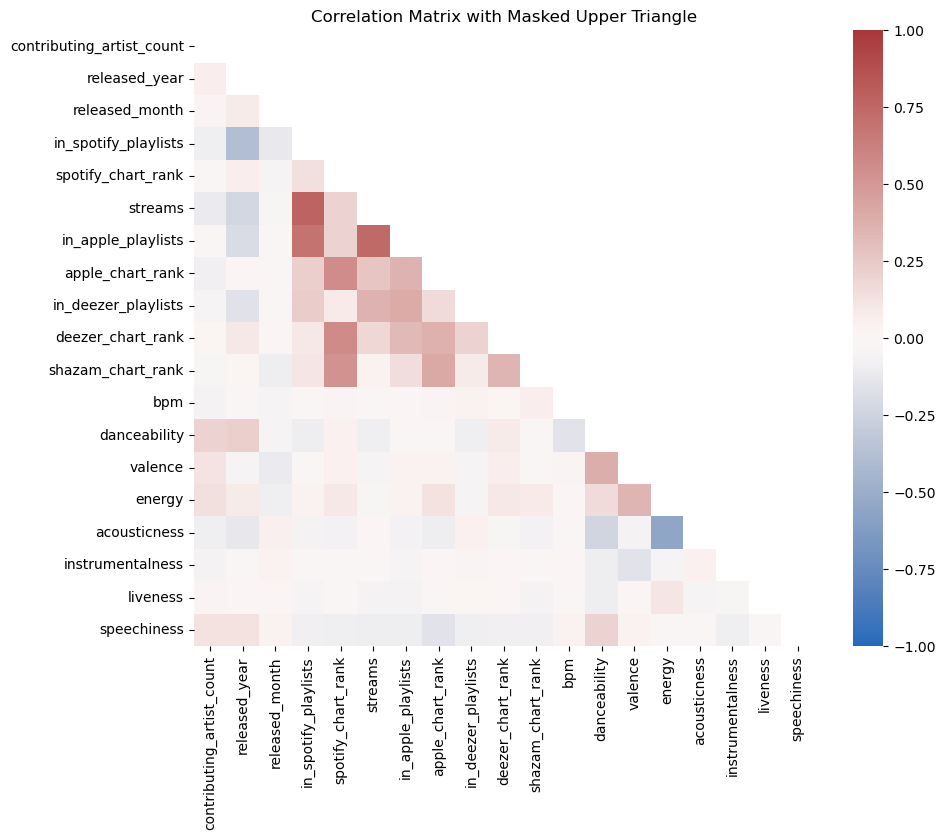

In [108]:
#EXPLORATORY DATA ANALYSIS (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the target column
target_column = 'streams'


# Visualize relationships (scatter plots)
for col in new_df.columns:  # Loop through all columns
    if col != target_column:  # Skip the target column
        sns.scatterplot(x=new_df[col], y=new_df[target_column])  # Use 'streams' as the target column
        plt.title(f'Scatter plot of {col} vs Target ({target_column})')
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.show()


# Create correlation matrix
matrix = new_df.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(matrix, annot=True, mask=mask, vmin=-1, vmax=1, center=0, cmap='vlag')

# Add title
plt.title('Correlation Matrix with Masked Upper Triangle')

# Show plot
plt.show()


In [109]:

matrix

,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,in_deezer_playlists,deezer_chart_rank,shazam_chart_rank,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
contributing_artist_count,1.00,0.07,0.03,-0.09,-0.01,-0.11,-0.02,-0.08,-0.05,0.02,-0.04,-0.06,0.21,0.12,0.14,-0.09,-0.06,0.03,0.13
released_year,0.07,1.00,0.08,-0.39,0.07,-0.23,-0.20,0.00,-0.16,0.10,0.02,-0.01,0.22,-0.05,0.08,-0.13,-0.02,0.01,0.13
released_month,0.03,0.08,1.00,-0.12,-0.05,-0.04,-0.03,-0.02,-0.02,0.01,-0.10,-0.05,-0.05,-0.11,-0.09,0.06,0.04,0.00,0.04
in_spotify_playlists,-0.09,-0.39,-0.12,1.00,0.14,0.78,0.69,0.22,0.23,0.10,0.11,-0.03,-0.10,-0.03,0.04,-0.06,-0.02,-0.05,-0.08
spotify_chart_rank,-0.01,0.07,-0.05,0.14,1.00,0.21,0.21,0.56,0.09,0.57,0.53,0.03,0.05,0.05,0.10,-0.07,-0.01,-0.03,-0.09
streams,-0.11,-0.23,-0.04,0.78,0.21,1.00,0.74,0.27,0.36,0.18,0.04,-0.03,-0.09,-0.05,-0.04,-0.00,-0.03,-0.06,-0.10
in_apple_playlists,-0.02,-0.20,-0.03,0.69,0.21,0.74,1.00,0.36,0.40,0.33,0.15,0.01,-0.01,0.04,0.04,-0.07,-0.05,-0.06,-0.10
apple_chart_rank,-0.08,0.00,-0.02,0.22,0.56,0.27,0.36,1.00,0.16,0.37,0.42,0.03,-0.03,0.04,0.13,-0.10,-0.00,-0.01,-0.15
in_deezer_playlists,-0.05,-0.16,-0.02,0.23,0.09,0.36,0.40,0.16,1.00,0.21,0.08,0.04,-0.09,-0.05,-0.05,0.05,0.03,0.02,-0.09
deezer_chart_rank,0.02,0.10,0.01,0.10,0.57,0.18,0.33,0.37,0.21,1.00,0.35,0.02,0.08,0.07,0.10,-0.04,0.00,0.00,-0.08


In [110]:
matrix = new_df.corr()
matrix = matrix.unstack()
matrix[matrix>0]

contributing_artist_count  contributing_artist_count    1.000000
                           released_year                0.073564
                           released_month               0.033857
                           deezer_chart_rank            0.020585
                           danceability                 0.214078
                                                          ...   
speechiness                released_month               0.042127
                           bpm                          0.038248
                           danceability                 0.201189
                           valence                      0.035704
                           speechiness                  1.000000
Length: 187, dtype: float64

In [111]:
#Initial Linear Regression
import statsmodels.api as sm


# Define your feature set and target variable
X = new_df.drop(columns=['streams'])  # All columns except the target
y = new_df['streams']  # Target column

# Add constant to features for intercept
X = sm.add_constant(X)

# Fit initial Linear Regression model
initial_model = sm.OLS(y, X).fit()
print(initial_model.summary())


                            OLS Regression Results                            
Dep. Variable:                streams   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     117.5
Date:                Sat, 12 Oct 2024   Prob (F-statistic):          5.28e-210
Time:                        08:06:02   Log-Likelihood:                -17031.
No. Observations:                 817   AIC:                         3.410e+04
Df Residuals:                     798   BIC:                         3.419e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

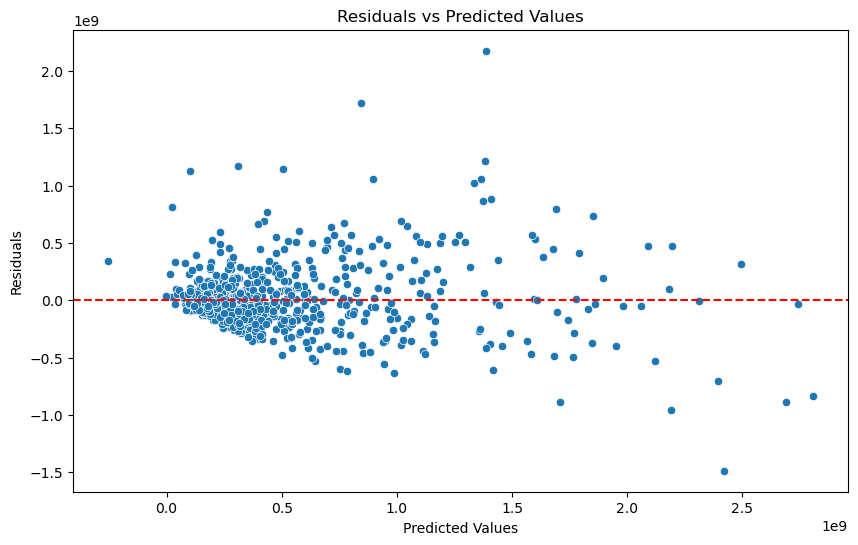

In [112]:
#Test for Linearity
residuals = y - initial_model.predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=initial_model.predict(X), y=residuals)
plt.axhline(0, color='red', ls='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [120]:
#Scale the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assuming X is your feature set




In [121]:
#Train-Test Split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [124]:
#Model Selection
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# # Optionally print the coefficients for interpretation
# print("Coefficients:", linear_model.coef_)
# print("Intercept:", linear_model.intercept_)


LinearRegression()

In [128]:
#Cross Validate
from sklearn.model_selection import cross_val_score

linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Linear Regression Cross-validated MSE:", -linear_cv_scores.mean())



Linear Regression Cross-validated MSE: 9.122567346110723e+16


In [129]:
#Model Evaluation on Test Data 
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R-squared: {r2}")



Test MSE: 6.424845628962312e+16
Test R-squared: 0.7604895952556441


In [130]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_poly = poly.fit_transform(X_train)

# Fit linear regression on polynomial features
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_poly, y_train)



LinearRegression()

In [135]:
#Final Model

print("Coefficients:", linear_model.coef_)
print("Model's y-intercetp:", linear_model.intercept_)

Coefficients: [ 0.00000000e+00 -2.11670217e+07  3.31234740e+07  1.66199725e+06
  2.63545399e+08  9.13913611e+07  1.92278471e+08 -3.77598337e+06
  5.69432405e+07 -3.41413916e+07 -7.09382651e+07 -2.27201241e+06
 -1.39698893e+07 -1.35656422e+07 -1.63952189e+07  1.66237836e+07
 -5.08640361e+06 -5.72114863e+06 -2.25671168e+06]
Model's y-intercetp: 463721494.0711206


In [138]:

# Display the model's best fit line formula
coefficients = " + ".join([f"{coef:.4f} * X{i+1}" for i, coef in enumerate(linear_model.coef_) if coef != 0])
print(f"Model's formula: y = {linear_model.intercept_:.4f} + {coefficients}")


Model's formula: y = 463721494.0711 + -21167021.6606 * X2 + 33123474.0060 * X3 + 1661997.2507 * X4 + 263545399.3216 * X5 + 91391361.0904 * X6 + 192278471.4476 * X7 + -3775983.3732 * X8 + 56943240.5472 * X9 + -34141391.5683 * X10 + -70938265.0503 * X11 + -2272012.4136 * X12 + -13969889.3017 * X13 + -13565642.2161 * X14 + -16395218.8707 * X15 + 16623783.5926 * X16 + -5086403.6061 * X17 + -5721148.6324 * X18 + -2256711.6780 * X19


In [143]:
# Display the formula to predict the streaming for a person in 7 years
# Assuming model.coef_ contains multiple coefficients and you want to represent them all
coefficients = " + ".join([f"{coef:.4f} * X{i+1}" for i, coef in enumerate(linear_model.coef_)])
print(f"Model's formula: y = {linear_model.intercept_:.4f} + {coefficients}")

# Predict the streams for an artist in 7 years 
y_7 = linear_model.intercept_ + sum(coef * (7 if i == 0 else 1) for i, coef in enumerate(linear_model.coef_))

# Display the prediction
print(f"Predicted streams of an artist in 7 years: {y_7:.2f}")


Model's formula: y = 463721494.0711 + 0.0000 * X1 + -21167021.6606 * X2 + 33123474.0060 * X3 + 1661997.2507 * X4 + 263545399.3216 * X5 + 91391361.0904 * X6 + 192278471.4476 * X7 + -3775983.3732 * X8 + 56943240.5472 * X9 + -34141391.5683 * X10 + -70938265.0503 * X11 + -2272012.4136 * X12 + -13969889.3017 * X13 + -13565642.2161 * X14 + -16395218.8707 * X15 + 16623783.5926 * X16 + -5086403.6061 * X17 + -5721148.6324 * X18 + -2256711.6780 * X19
Predicted streams of an artist in 7 years: 929999532.96


In [144]:
# Make predictions using the X set
predicted_y_values = linear_model.predict(X)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [146]:
# Create a copy of the original cleaned streaming data
df_streamed_predicted = new_df.copy()

# Add a column with the predicted streaming values
df_streamed_predicted["streams_predicted"] = predicted_y_values

# Display sample data
df_streamed_predicted.head()


,contributing_artist_count,released_year,released_month,in_spotify_playlists,spotify_chart_rank,streams,in_apple_playlists,apple_chart_rank,in_deezer_playlists,deezer_chart_rank,shazam_chart_rank,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,streams_predicted
0,2.0,2023.0,7.0,553.0,147.0,141381703.0,43.0,263.0,45.0,10.0,826.0,125.0,80.0,89.0,83.0,31.0,0.0,8.0,4.0,1.740087e+11
1,1.0,2023.0,3.0,1474.0,48.0,133716286.0,48.0,126.0,58.0,14.0,382.0,92.0,71.0,61.0,74.0,7.0,0.0,10.0,4.0,4.415974e+11
2,1.0,2023.0,6.0,1397.0,113.0,140003974.0,94.0,207.0,91.0,14.0,949.0,138.0,51.0,32.0,53.0,17.0,0.0,31.0,6.0,3.984001e+11
3,1.0,2019.0,8.0,7858.0,100.0,800840817.0,116.0,207.0,125.0,12.0,548.0,170.0,55.0,58.0,72.0,11.0,0.0,11.0,15.0,2.133732e+12
4,1.0,2023.0,5.0,3133.0,50.0,303236322.0,84.0,133.0,87.0,15.0,425.0,144.0,65.0,23.0,80.0,14.0,63.0,11.0,6.0,8.846363e+11


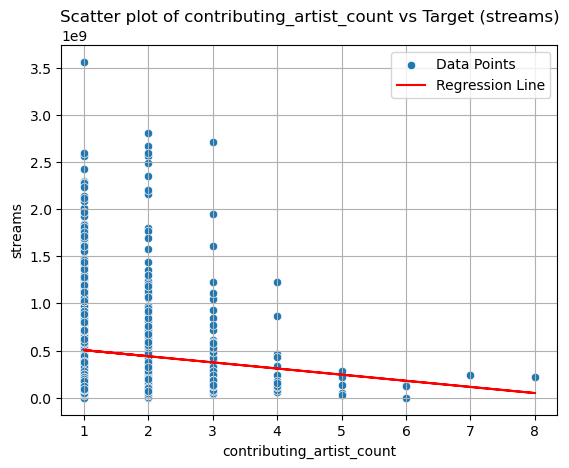

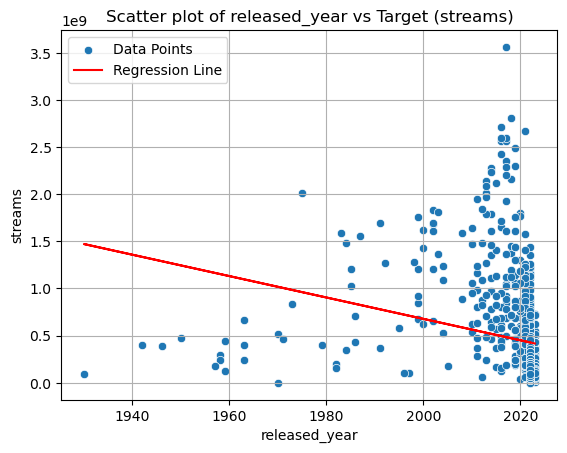

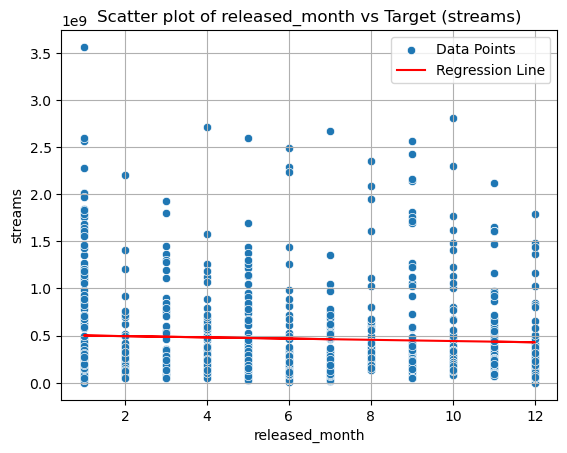

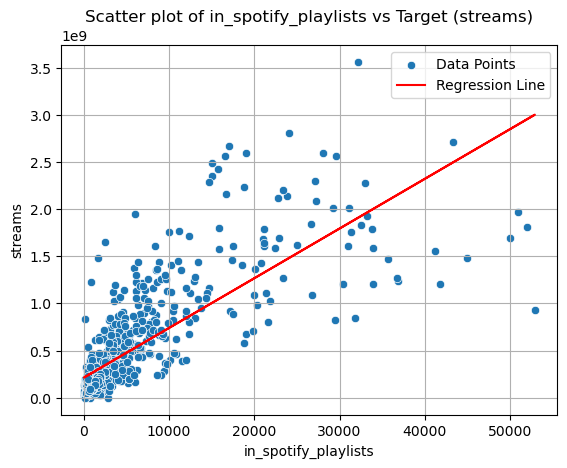

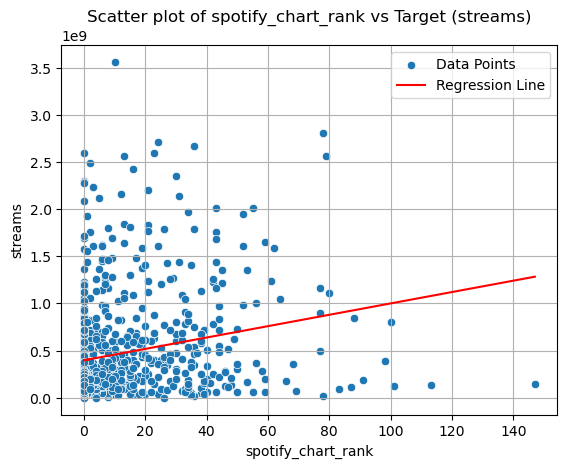

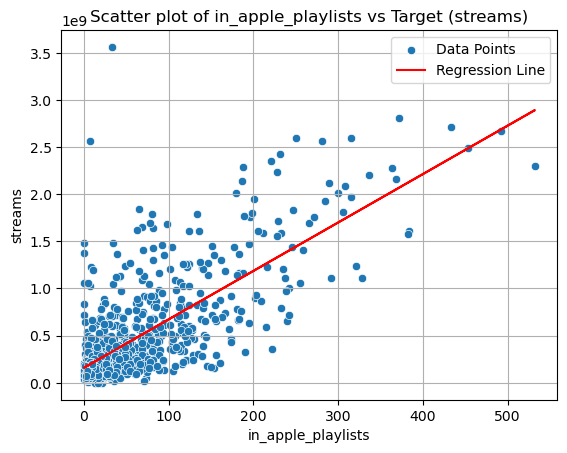

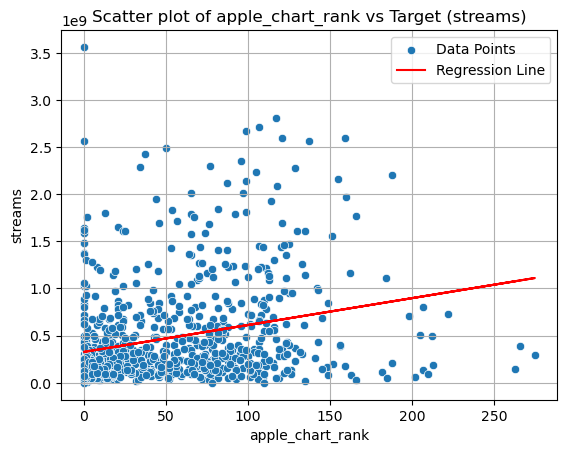

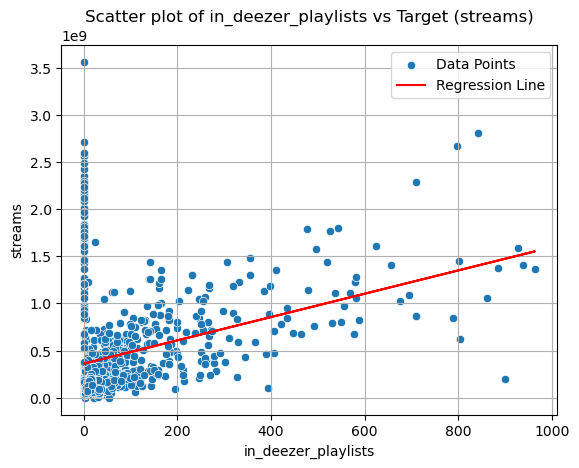

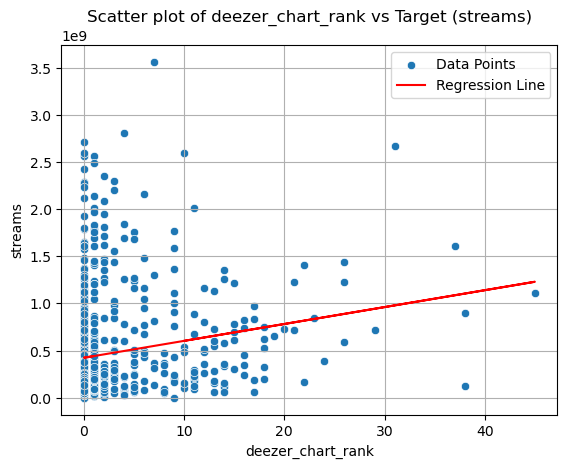

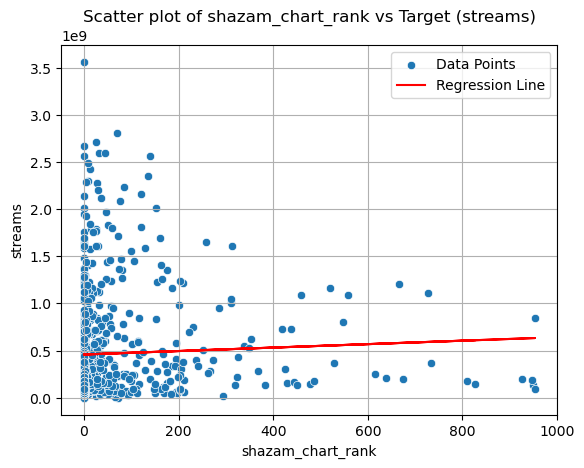

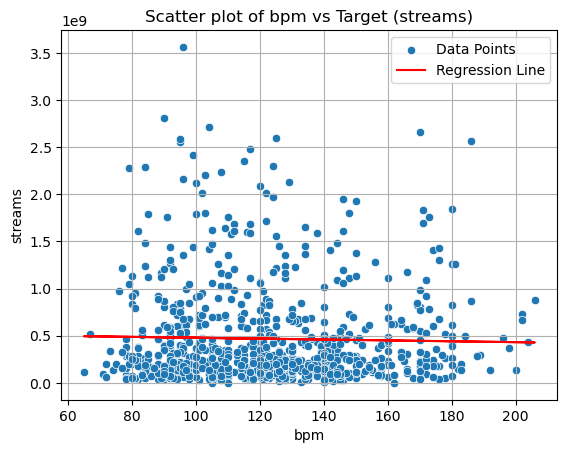

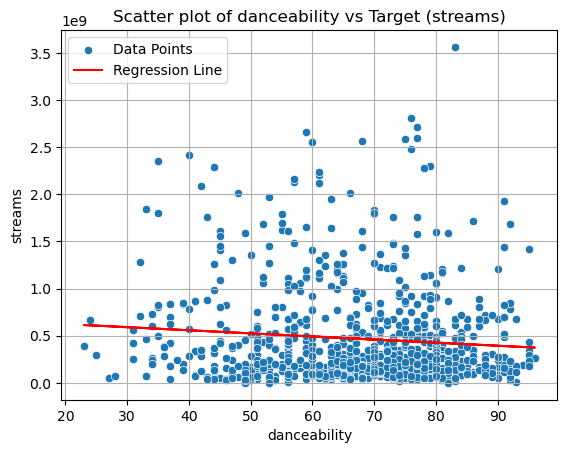

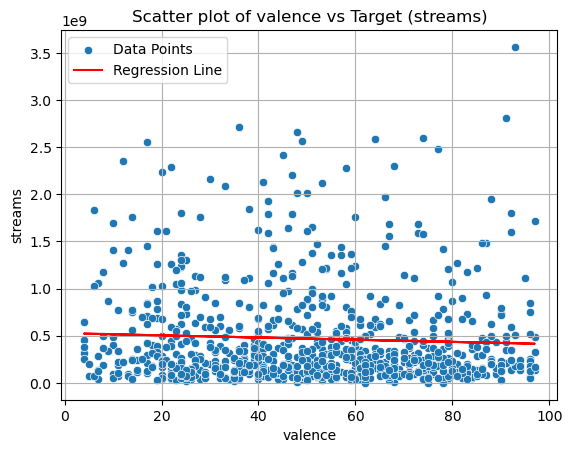

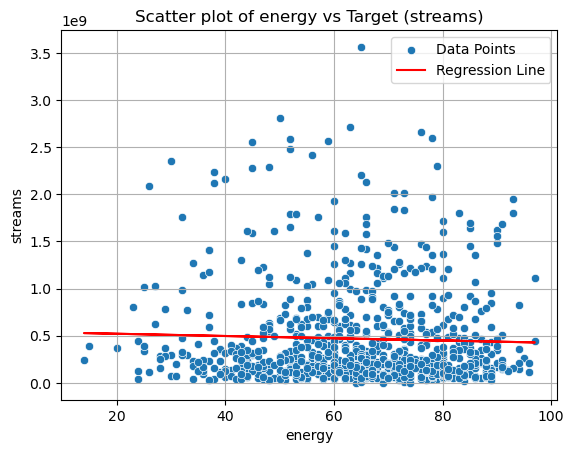

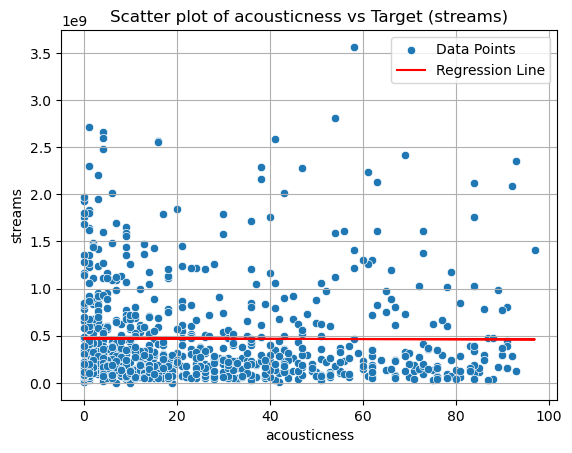

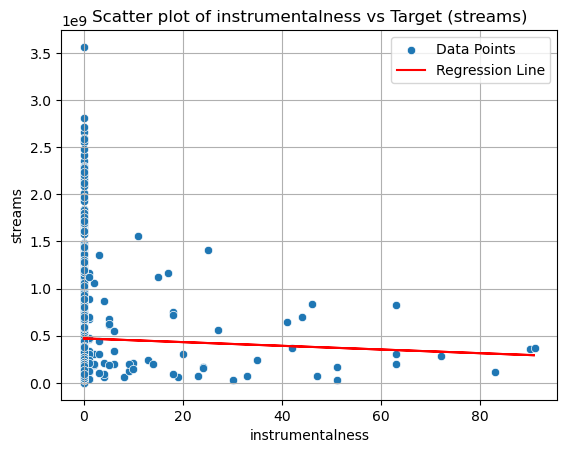

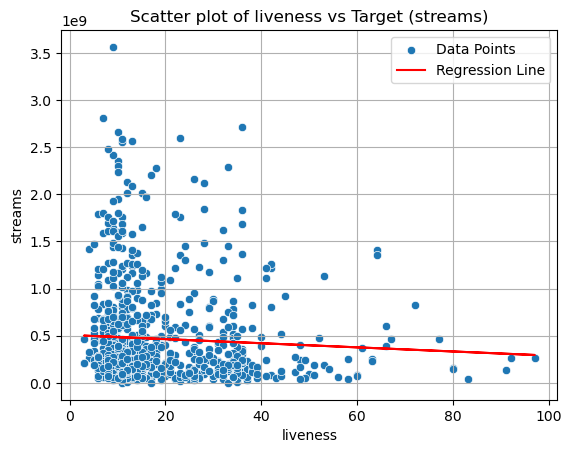

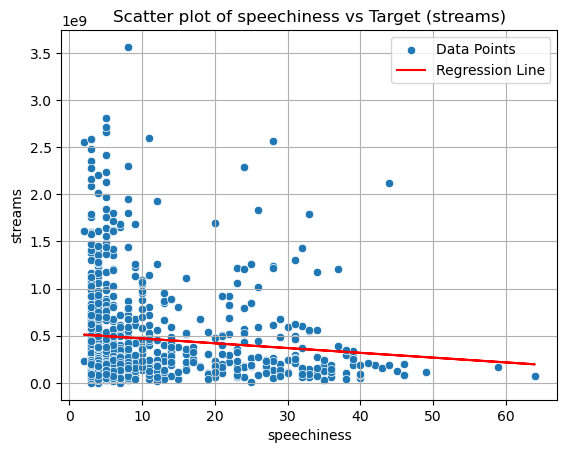

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming df_streamed_predicted has your predicted values
for col in df_streamed_predicted.columns:  # Loop through all columns in the DataFrame
    if col != target_column and col != "streams_predicted":  # Skip the target column and the predicted column
        # Create scatter plot
        sns.scatterplot(x=df_streamed_predicted[col], y=df_streamed_predicted[target_column], label='Data Points')
        
        # Fit a linear regression model for the current feature
        X = df_streamed_predicted[[col]]  # Reshape for a single feature
        y = df_streamed_predicted[target_column]
        model = LinearRegression()
        model.fit(X, y)
        
        # Generate predicted values based on the feature
        predicted_y = model.predict(X)
        
        # Overlay the linear regression line
        plt.plot(df_streamed_predicted[col], predicted_y, color='red', label='Regression Line')

        # Set plot titles and labels
        plt.title(f'Scatter plot of {col} vs Target ({target_column})')
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.legend()
        plt.grid()
        plt.show()



/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


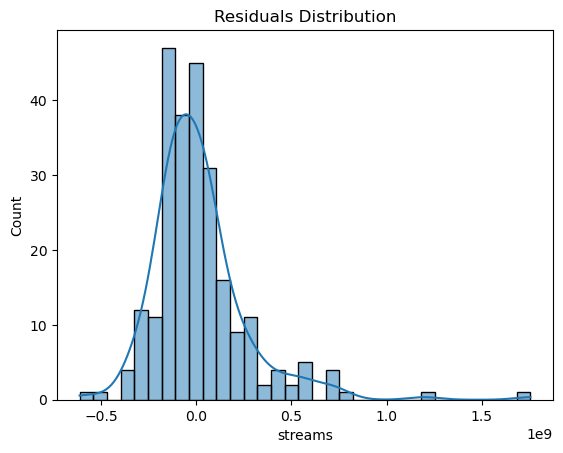

In [132]:
#Check Residuals 

import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()
